<a href="https://colab.research.google.com/github/KudohAtsuo/mask-detection/blob/main/mask_detect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt




In [ ]:
import os
os.environ['KAGGLE_USERNAME']=''
os.environ['KAGGLE_KEY']=''

In [ ]:
!kaggle datasets download -d prithwirajmitra/covid-face-mask-detection-dataset

 93% 193M/207M [00:02<00:00, 105MB/s]
100% 207M/207M [00:02<00:00, 93.0MB/s]


In [ ]:
!unzip covid-face-mask-detection-dataset

Archive:  covid-face-mask-detection-dataset.zip
  inflating: New Masks Dataset/Test/Mask/2070.jpg  
  inflating: New Masks Dataset/Test/Mask/2072.jpg  
  inflating: New Masks Dataset/Test/Mask/2083.jpg  
  inflating: New Masks Dataset/Test/Mask/2085.jpg  
  inflating: New Masks Dataset/Test/Mask/2086.jpg  
  inflating: New Masks Dataset/Test/Mask/2110.jpg  
  inflating: New Masks Dataset/Test/Mask/2113.jpg  
  inflating: New Masks Dataset/Test/Mask/2114.jpeg  
  inflating: New Masks Dataset/Test/Mask/2130.jpg  
  inflating: New Masks Dataset/Test/Mask/2132.jpg  
  inflating: New Masks Dataset/Test/Mask/2135.jpg  
  inflating: New Masks Dataset/Test/Mask/2154.png  
  inflating: New Masks Dataset/Test/Mask/2158.png  
  inflating: New Masks Dataset/Test/Mask/2159.png  
  inflating: New Masks Dataset/Test/Mask/2160.png  
  inflating: New Masks Dataset/Test/Mask/2170.png  
  inflating: New Masks Dataset/Test/Mask/2172.png  
  inflating: New Masks Dataset/Test/Mask/2173.png  
  inflating: Ne

In [ ]:
base_dir='/content/New Masks Dataset'
train_dir=os.path.join(base_dir, 'Train')
test_dir=os.path.join(base_dir, 'Test')
validation_dir=os.path.join(base_dir, 'Validation')

train_mask_dir=os.path.join(train_dir, 'Mask')
train_nomask_dir=os.path.join(train_dir, 'Non Mask')



In [ ]:
train_mask_files=os.listdir(train_mask_dir)
print(train_mask_files[:8])

['1110.jpg', '0415.jpg', '1554.jpg', '0639.jpg', '1626.jpg', '1112.jpg', '0655.jpg', '1645.jpg']


In [ ]:
train_nomask_files=os.listdir(train_nomask_dir)
print(train_nomask_files[:8])

['125.jpg', '117.jpg', '241.jpg', '102.jpg', '269.jpg', '10.jpg', '183.jpg', '84.jpg']


In [ ]:
import matplotlib.image as mpimg
nrows = 4
ncols = 4
plt.figure(figsize=(12,12))

mask_images = []
for i in train_mask_files[:8]:
    mask_images.append(os.path.join(train_mask_dir, i))

nomask_images = []
for i in train_nomask_files[:8]:
    nomask_images.append(os.path.join(train_nomask_dir, i)) 

print(mask_images)
print(nomask_images)

['/content/New Masks Dataset/Train/Mask/1110.jpg', '/content/New Masks Dataset/Train/Mask/0415.jpg', '/content/New Masks Dataset/Train/Mask/1554.jpg', '/content/New Masks Dataset/Train/Mask/0639.jpg', '/content/New Masks Dataset/Train/Mask/1626.jpg', '/content/New Masks Dataset/Train/Mask/1112.jpg', '/content/New Masks Dataset/Train/Mask/0655.jpg', '/content/New Masks Dataset/Train/Mask/1645.jpg']
['/content/New Masks Dataset/Train/Non Mask/125.jpg', '/content/New Masks Dataset/Train/Non Mask/117.jpg', '/content/New Masks Dataset/Train/Non Mask/241.jpg', '/content/New Masks Dataset/Train/Non Mask/102.jpg', '/content/New Masks Dataset/Train/Non Mask/269.jpg', '/content/New Masks Dataset/Train/Non Mask/10.jpg', '/content/New Masks Dataset/Train/Non Mask/183.jpg', '/content/New Masks Dataset/Train/Non Mask/84.jpg']


<Figure size 864x864 with 0 Axes>

In [ ]:
merged_images = mask_images + nomask_images

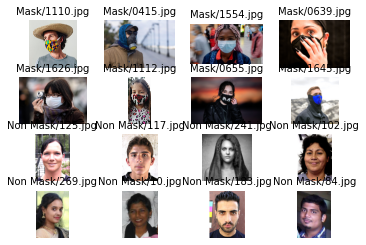

In [ ]:
for i in range(0, len(merged_images)):
    data=merged_images[i].split('/', 4)[-1]
    sp = plt.subplot(nrows, ncols, i+1)
    sp.axis('off')
    img = mpimg.imread(merged_images[i])
    sp.set_title(data, fontsize=10)
    plt.imshow(img, cmap='gray')

plt.show()

In [ ]:
train_datagenerator = ImageDataGenerator(rescale=1./255,
                                         zoom_range=0.2,
                                         rotation_range=50,
                                         horizontal_flip=True)

test_datagenerator = ImageDataGenerator(rescale=1./255)

valid_datagenerator = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagenerator.flow_from_directory(train_dir, class_mode='binary', target_size=(150,150),batch_size=32)
test_generator = test_datagenerator.flow_from_directory(test_dir, class_mode='binary', target_size=(150,150),batch_size=32)
valid_generator = valid_datagenerator.flow_from_directory(validation_dir, class_mode='binary', target_size=(150,150),batch_size=32)

Found 600 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Found 306 images belonging to 2 classes.


In [ ]:
train_generator.class_indices

{'Mask': 0, 'Non Mask': 1}

In [ ]:
train_generator.image_shape

(150, 150, 3)

モデルの定義

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 75, 75, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 37, 37, 64)        0

コンパイルとトレーニング

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_generator, epochs=30, validation_data=valid_generator)

Epoch 1/30
19/19 [==============================] - 27s 767ms/step - loss: 3.1686 - accuracy: 0.4900 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/30
19/19 [==============================] - 13s 715ms/step - loss: 0.6763 - accuracy: 0.5967 - val_loss: 0.6868 - val_accuracy: 0.5065
Epoch 3/30
19/19 [==============================] - 13s 726ms/step - loss: 0.5298 - accuracy: 0.7733 - val_loss: 0.5030 - val_accuracy: 0.8170
Epoch 4/30
19/19 [==============================] - 14s 719ms/step - loss: 0.3593 - accuracy: 0.8583 - val_loss: 0.4114 - val_accuracy: 0.8366
Epoch 5/30
19/19 [==============================] - 14s 719ms/step - loss: 0.3419 - accuracy: 0.8683 - val_loss: 0.4106 - val_accuracy: 0.8922
Epoch 6/30
19/19 [==============================] - 14s 729ms/step - loss: 0.3059 - accuracy: 0.8783 - val_loss: 0.3589 - val_accuracy: 0.9150
Epoch 7/30
19/19 [==============================] - 14s 736ms/step - loss: 0.2791 - accuracy: 0.9083 - val_loss: 0.3484 - val_accuracy: 0.8725

Text(0.5, 1.0, 'Training Accuracy / Validation Accuracy')

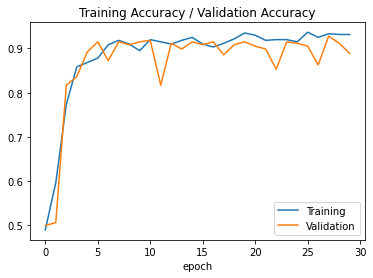

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.xlabel('epoch')
plt.title('Training Accuracy / Validation Accuracy')

Text(0.5, 1.0, 'Training Loss / Validation Loss')

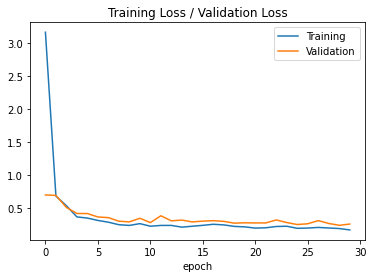

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.xlabel('epoch')
plt.title('Training Loss / Validation Loss')

In [ ]:
from google.colab import files
from tensorflow.keras.preprocessing import image

uploaded = files.upload()
print(uploaded.keys())

for filename in uploaded.keys():
    file_path = '/content/' + filename
    img = image.load_img(file_path, target_size=(150,150))
    img = image.img_to_array(img)
    images = np.expand_dims(img, 0)
    prediction = model.predict(images)

    if prediction == 0:
        print('with Mask')

    else:
        print('no Mask')

Saving mask_man.jpg to mask_man.jpg
dict_keys(['mask_man.jpg'])
with Mask


In [ ]:
model.save('mask_model.h5')

In [ ]:
!pip show tensorflow

Name: tensorflow
Version: 2.7.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.7/dist-packages
Requires: keras, grpcio, protobuf, libclang, h5py, flatbuffers, opt-einsum, keras-preprocessing, absl-py, numpy, tensorflow-estimator, six, google-pasta, astunparse, typing-extensions, termcolor, wheel, tensorflow-io-gcs-filesystem, wrapt, tensorboard, gast
Required-by: kapre
